In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   #gradient assent
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

In [2]:
df=pd.read_csv('Student_Performance.csv')
# df['Extracurricular Activities']=df['Extracurricular Activities'].replace({'Yes':1,'No':0})
df['Extracurricular Activities']=np.where(df['Extracurricular Activities']=='Yes','1','0')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [3]:
# x=df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities']]
x=df.drop(columns='Performance Index',axis=1)
y=df[['Performance Index']]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [5]:
model=LinearRegression()

In [6]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
model.intercept_

array([-33.92194622])

In [8]:
model.coef_

array([[2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]])

In [9]:
ypred=model.predict(x_test)

In [10]:
y_test-ypred

,Performance Index
6252,-3.711854
4684,-2.615513
1731,-1.903145
4742,-3.289767
4521,-2.004570
...,...
6412,-1.886280
8285,3.301975
7853,-0.793420
1095,1.656726


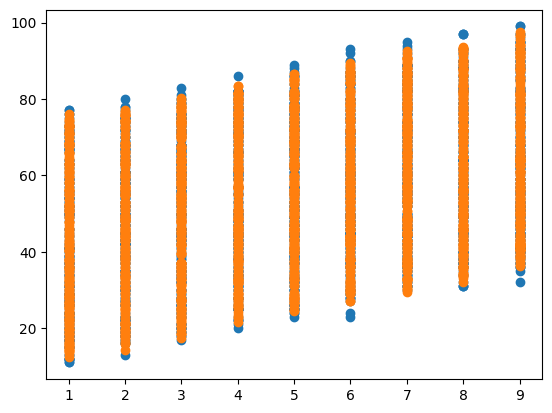

In [11]:
plt.scatter(x_test['Hours Studied'],y_test)
plt.scatter(x_test['Hours Studied'],ypred)

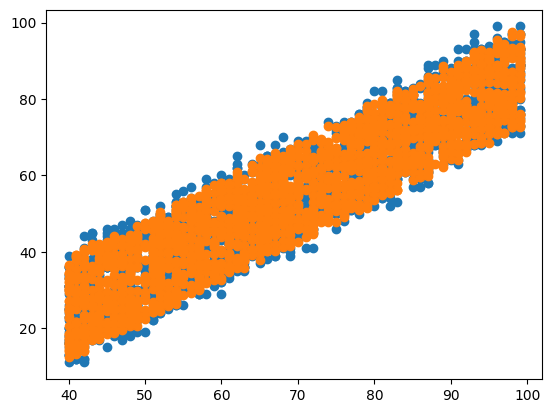

In [12]:
plt.scatter(x_test['Previous Scores'],y_test)
plt.scatter(x_test['Previous Scores'],ypred)

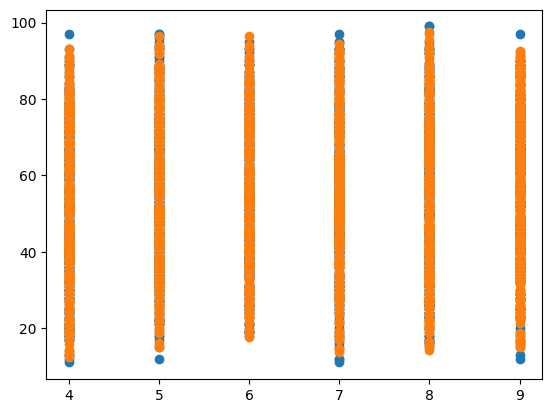

In [13]:
plt.scatter(x_test['Sleep Hours'],y_test)
plt.scatter(x_test['Sleep Hours'],ypred)

In [14]:
r2_score(y_test,ypred)

0.9889832909573145

In [15]:
mean_squared_error(y_test,ypred)

4.082628398521854

In [16]:
mean_absolute_error(y_test,ypred)

1.6111213463123042

Conclusion:
1) The initial value when x=0 is -33[intercept]
3) As output seen like the actual output and predicted output having some difference so there is error present
4) Accuracy of the model is 98%
5) MSE=4
6) MAE=1